# Spotify Track Analysis

## Loading Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset into a dataframe
df = pd.read_csv('dataset.csv')
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


## Initial Data Analysis

In [3]:
# Quick look at the data
print("Columns in dataset:")
df.columns

Columns in dataset:


Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [4]:
# Basic info and stats
print("\nData info:")
df.info()


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness

In [5]:
# Check for missing values
print("Missing data points:")
df_missing = df[df.isnull().any(axis=1)]
df_missing

Missing data points:


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


## Data Cleaning

In [6]:
df.dropna(inplace=True)  # Drop rows with missing values since it is only one data point
len(df)  # Check the length of the dataframe after dropping missing values

113999

## Explicit Track Analysis

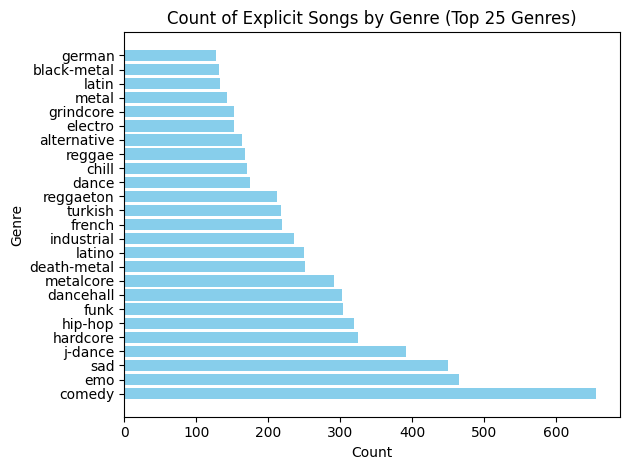

In [7]:
# Plot only the explicit (True) counts by genre
df_explicit = df[df['explicit'] == True]
df_non_explicit = df[df['explicit'] == False]

genre_counts = df_explicit['track_genre'].value_counts().head(25)

plt.barh(genre_counts.index, genre_counts.values, color='skyblue')

plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Count of Explicit Songs by Genre (Top 25 Genres)')
plt.tight_layout()
plt.show()


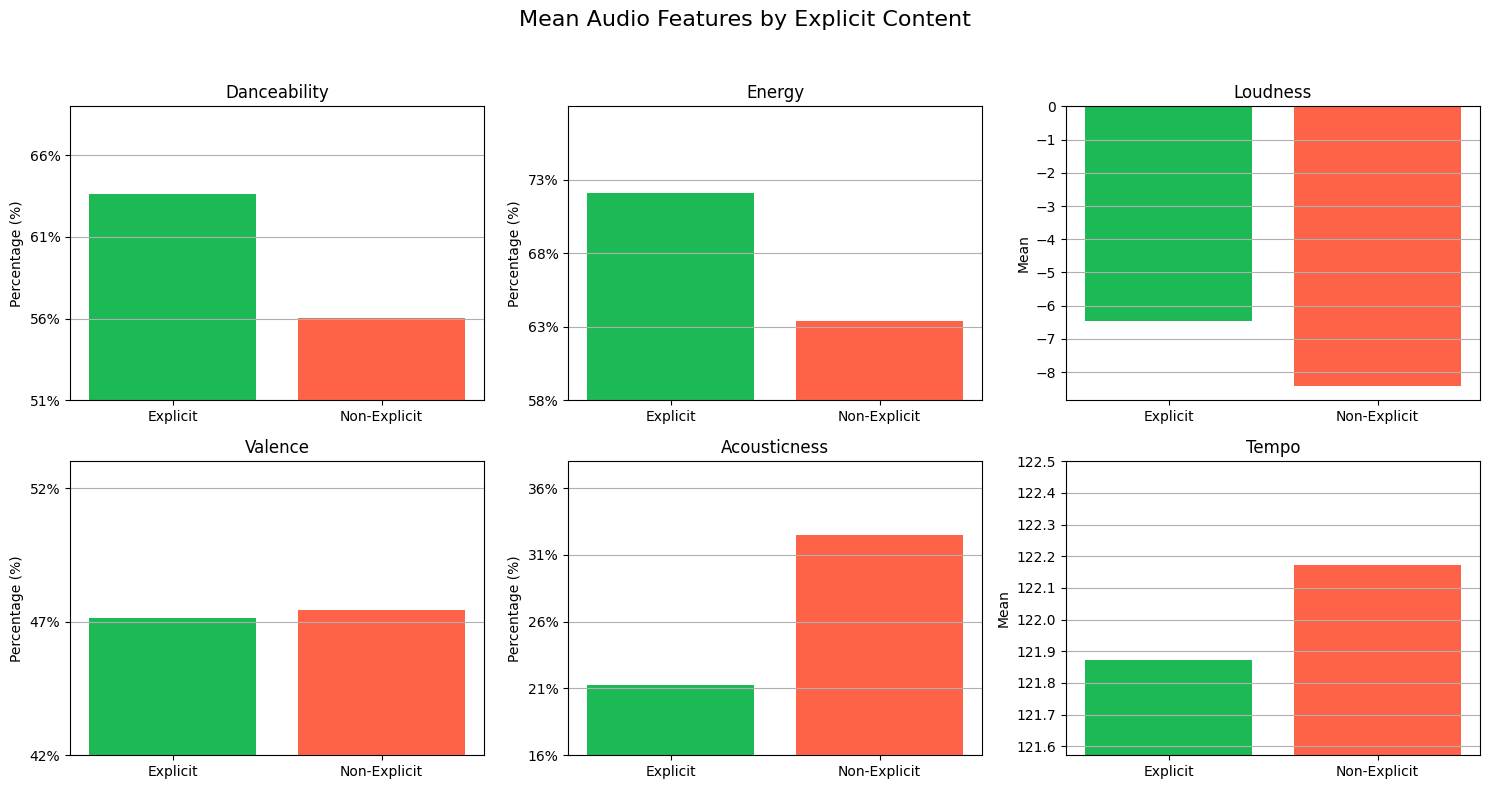

In [8]:
features = ['danceability', 'energy', 'loudness', 'valence', 'acousticness', 'tempo']
percentage_features = ['danceability', 'energy', 'valence', 'acousticness']

explicit_means = df_explicit[features].mean()
non_explicit_means = df_non_explicit[features].mean()

# Convert to percentages
explicit_means[percentage_features] *= 100
non_explicit_means[percentage_features] *= 100

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].bar(['Explicit', 'Non-Explicit'], 
                [explicit_means[feature], non_explicit_means[feature]], 
                color=['#1DB954', '#FF6347'])
    axes[i].set_title(f'{feature.capitalize()}')
    axes[i].set_ylabel('Mean')
    axes[i].grid(axis='y')

    
    if feature in percentage_features:
        min_val = min(explicit_means[feature], non_explicit_means[feature])
        max_val = max(explicit_means[feature], non_explicit_means[feature])
        buffer = 5
        tick_start = int(min_val - buffer)
        tick_end = int(max_val + buffer) + 1
        ticks = list(range(tick_start, tick_end, 5))
        axes[i].set_ylim(tick_start, tick_end)
        axes[i].set_yticks(ticks)
        axes[i].set_yticklabels([f'{t}%' for t in ticks])
        axes[i].set_ylabel('Percentage (%)')

    
    # Custom Y-axis for tempo
    elif feature == 'tempo':
        min_val = min(explicit_means['tempo'], non_explicit_means['tempo'])
        max_val = max(explicit_means['tempo'], non_explicit_means['tempo'])
        buffer = 0.3  # add a bit of space above/below
        axes[i].set_ylim(min_val - buffer, max_val + buffer)
        axes[i].set_yticks(np.arange(round(min_val - buffer, 1), round(max_val + buffer, 1) + 0.01, 0.1))

fig.suptitle('Mean Audio Features by Explicit Content', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

